# The Inter Academy 

**Task 1 - Titanic Exploratory Data Analysis**



**By NASIR KHAN**

**Survival Prediction - Titanic Disaster**

**Objective** - The Objective of Dataset is to predict whether a given passenger survived or not

The data has been split into two groups:

training set (train.csv) test set (test.csv) The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

**Data Dictionary**

**Variable Definition Key**

Survival -  0 = No, 1 = Yes

Pclass - Ticket Class 1 = 1st, 2 = 2nd, 3 = 3rd

Sex - Male or Female

Age - Age in years

SibSp - Siblings / Spouses aboard the Titanic ( Sibling = brother, sister, stepbrother, stepsister) (Spouse = husband, wife (mistresses and fiancés were ignored))

Parch - Parents / Children aboard the Titanic ( Parent = mother, father) (Child = daughter, son, stepdaughter, stepson)

Ticket - Ticket Number

Fare -  Passenger Fare

Cabin - Cabin Number

Embarked - Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


**Datasource:**

The dataset is taken from [Kaggle](https://www.kaggle.com/shuofxz/titanic-machine-learning-from-disaster/tasks?taskId=2692)

**Import Libraries or Packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#plt.style.use("fivethirtyeight")
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


           ##Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

**Read the Dataset**

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv('train.csv')

print("Read The Data Successfully")

Read The Data Successfully


**Isnull() function detects non-missing values in the dataframe. All of the non-missing values gets mapped to "False" and missing values get mapped to "True".**

In [3]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
test_df.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


**If we would like to get a statistical summary of each column, such as count, column mean value, column standard deviation, etc. We use the describe method:**

**This method will provide various summary statistics, excluding NaN (Not a Number) values.**

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Having a Look that Data Contains Missing Values Or Not in Percentage**

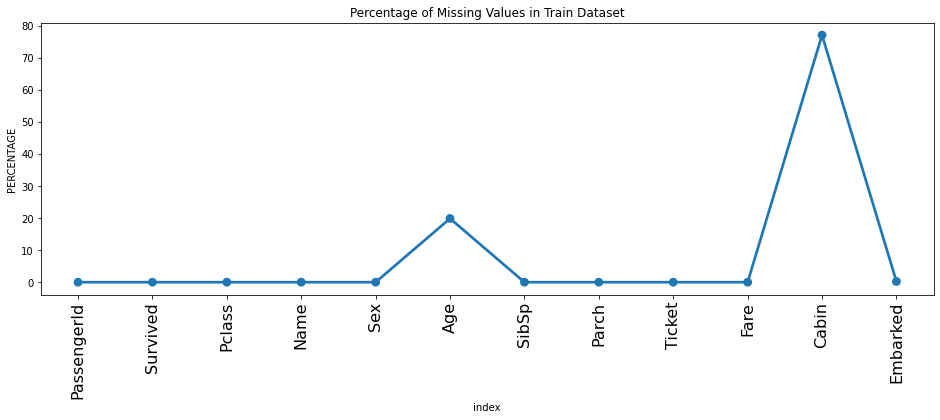

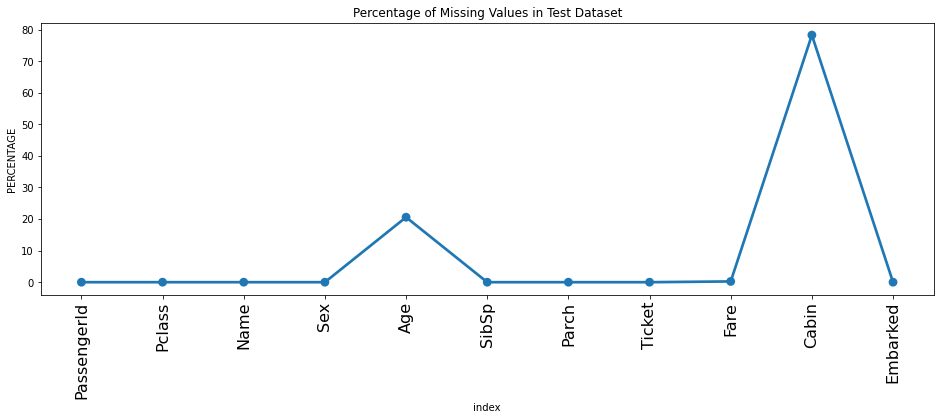

In [7]:
# Missing Values in Train Dataset
missing = pd.DataFrame((train_df.isnull().sum())*100/train_df.shape[0]).reset_index()
plt.figure(figsize = (16,5))
ax = sns.pointplot('index',0,data =missing)
plt.xticks(rotation =90,fontsize =16)
plt.title('Percentage of Missing Values in Train Dataset')
plt.ylabel("PERCENTAGE")
plt.show()

# Missing Values in Test Dataset
missing = pd.DataFrame((test_df.isnull().sum())*100/test_df.shape[0]).reset_index()
plt.figure(figsize = (16,5))
ax = sns.pointplot('index',0,data =missing)
plt.xticks(rotation =90,fontsize =16)
plt.title('Percentage of Missing Values in Test Dataset')
plt.ylabel("PERCENTAGE")
plt.show()

**This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.**

In [8]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

**Cabin Featuere has more than 75% of missing data in both Test and Train data so we are remove the Cabin Feature.**

In [9]:
drop_column = ['Cabin']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column,axis=1,inplace=True)

**Fill The Missing Values using Median & Mode.**

In [10]:
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])


train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

**Dropping The Features/Columns Which Have No Significance**

In [11]:
train_df.drop(['PassengerId', 'Ticket', 'Fare'], axis ='columns' , inplace = True)
test_df.drop(['Ticket', 'Fare'], axis ='columns' , inplace = True)

**Check the NaN Value in Train & Test Data**

In [12]:
print('Check the NaN Value in Train Data')
print(train_df.isnull().sum())
print('___'*15)
print('Check the NaN Value in Test Data')
print(test_df.isnull().sum())

Check the NaN Value in Train Data
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64
_____________________________________________
Check the NaN Value in Test Data
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64


# Analyze by Pivoting Features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.


**Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived. We decide to include this feature in our model.

**Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74%.

**SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features.

In [13]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Creating New Feature Extracting From Existing

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name Features.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

**Combine Test & Train as Single To Apply Some Function**

In [17]:
combine = [train_df, test_df]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


**We can Replace Many Titles With a More Common Name Or Classify Them as Rare**

In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


**We Can Convert The Categorical Titles To Ordinal.**

In [19]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,1


In [20]:
# Now we can safely drop the Name feature from training and testing dataset.

train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape


((891, 8), (418, 8))

**Converting a Categorical Feature**

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [21]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,0,22.0,1,0,S,1
1,1,1,1,38.0,1,0,C,3
2,1,3,1,26.0,0,0,S,2
3,1,1,1,35.0,1,0,S,3
4,0,3,0,35.0,0,0,S,1


**Create Bin for Age Feature**

In [22]:
for dataset in combine:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,80], labels=['Children','Teenage','Adult','Elder'])

In [23]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Age_bin
0,0,3,0,22.0,1,0,S,1,Adult
1,1,1,1,38.0,1,0,C,3,Adult
2,1,3,1,26.0,0,0,S,2,Adult
3,1,1,1,35.0,1,0,S,3,Adult
4,0,3,0,35.0,0,0,S,1,Adult
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,S,5,Adult
887,1,1,1,19.0,0,0,S,2,Teenage
888,0,3,1,28.0,1,2,S,2,Adult
889,1,1,0,26.0,0,0,C,1,Adult


In [24]:
train_df.tail(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Age_bin
871,1,1,1,47.0,1,1,S,3,Elder
872,0,1,0,33.0,0,0,S,1,Adult
873,0,3,0,47.0,0,0,S,1,Elder
874,1,2,1,28.0,1,0,C,3,Adult
875,1,3,1,15.0,0,0,C,2,Teenage
876,0,3,0,20.0,0,0,S,1,Teenage
877,0,3,0,19.0,0,0,S,1,Teenage
878,0,3,0,28.0,0,0,S,1,Adult
879,1,1,1,56.0,0,1,C,3,Elder
880,1,2,1,25.0,0,1,S,3,Adult


In [25]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Age_bin
0,0,3,0,22.0,1,0,S,1,Adult
1,1,1,1,38.0,1,0,C,3,Adult
2,1,3,1,26.0,0,0,S,2,Adult
3,1,1,1,35.0,1,0,S,3,Adult
4,0,3,0,35.0,0,0,S,1,Adult
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,S,5,Adult
887,1,1,1,19.0,0,0,S,2,Teenage
888,0,3,1,28.0,1,2,S,2,Adult
889,1,1,0,26.0,0,0,C,1,Adult


In [26]:
train_df['Age_bin'].value_counts()

Adult       562
Elder       150
Teenage     110
Children     69
Name: Age_bin, dtype: int64

**Fix the Outlier in Age Feature**

<AxesSubplot:xlabel='Age'>

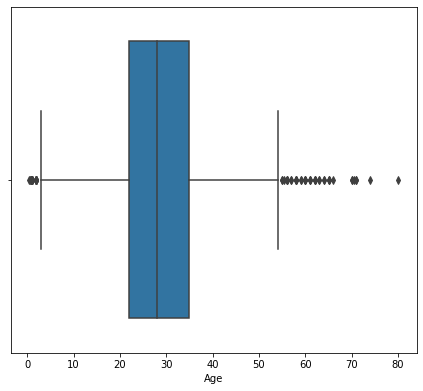

In [27]:
# For Train Data
plt.figure(figsize= (16,14))

plt.subplot(221)
sns.boxplot(train_df['Age'])

<AxesSubplot:xlabel='Age'>

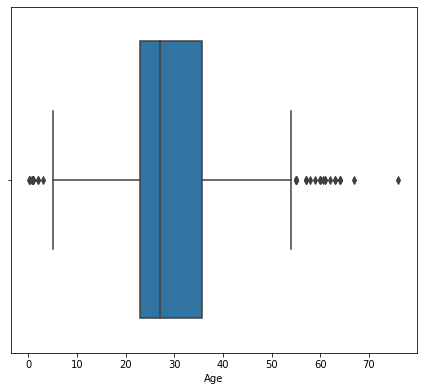

In [28]:
# For Test Data
plt.figure(figsize= (16,14))

plt.subplot(221)
sns.boxplot(test_df['Age'])

In [29]:
train_df['Age'] = train_df['Age'].clip(lower=train_df['Age'].quantile(0.05), upper=train_df['Age'].quantile(0.95))

test_df['Age'] = test_df['Age'].clip(lower=test_df['Age'].quantile(0.10), upper=test_df['Age'].quantile(0.90))


**Create New Feature Combining Existing Features**

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [30]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


**We can create another feature called IsAlone.**

In [31]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [32]:
#Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Embarked,Title,Age_bin,FamilySize,IsAlone
0,0,3,0,22.0,S,1,Adult,2,0
1,1,1,1,38.0,C,3,Adult,2,0
2,1,3,1,26.0,S,2,Adult,1,1
3,1,1,1,35.0,S,3,Adult,2,0
4,0,3,0,35.0,S,1,Adult,1,1


**Completing a Categorical Feature**

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [33]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


**Converting Categorical Feature to Numeric**

In [34]:
#We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Embarked,Title,Age_bin,FamilySize,IsAlone
0,0,3,0,22.0,0,1,Adult,2,0
1,1,1,1,38.0,1,3,Adult,2,0
2,1,3,1,26.0,0,2,Adult,1,1
3,1,1,1,35.0,0,3,Adult,2,0
4,0,3,0,35.0,0,1,Adult,1,1


In [35]:
train_df['Embarked'].unique()

array([0, 1, 2])

In [36]:
#We can now convert the Age_bin feature by creating a new numeric feature.

for dataset in combine:
    dataset['Age_bin'] = dataset['Age_bin'].map( {'Children': 0, 'Teenage': 1, 'Adult': 2, 'Elder':3} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Embarked,Title,Age_bin,FamilySize,IsAlone
0,0,3,0,22.0,0,1,2,2,0
1,1,1,1,38.0,1,3,2,2,0
2,1,3,1,26.0,0,2,2,1,1
3,1,1,1,35.0,0,3,2,2,0
4,0,3,0,35.0,0,1,2,1,1


# Exploratory Data Analysis

**Correletion**

In [37]:
train_df.corr()

,Survived,Pclass,Sex,Age,Embarked,Title,Age_bin,FamilySize,IsAlone
Survived,1.000000,-0.338481,0.543351,-0.054778,0.106811,0.407753,-0.088324,0.016639,-0.203367
Pclass,-0.338481,1.000000,-0.131900,-0.344967,0.045702,-0.173929,-0.265478,0.065997,0.135207
Sex,0.543351,-0.131900,1.000000,-0.074322,0.116569,0.502713,-0.080977,0.200988,-0.303646
Age,-0.054778,-0.344967,-0.074322,1.000000,-0.014105,-0.075749,0.907824,-0.243708,0.160953
Embarked,0.106811,0.045702,0.116569,-0.014105,1.000000,0.045400,0.012463,-0.080281,0.017807
Title,0.407753,-0.173929,0.502713,-0.075749,0.045400,1.000000,-0.171273,0.342039,-0.405813
Age_bin,-0.088324,-0.265478,-0.080977,0.907824,0.012463,-0.171273,1.000000,-0.322130,0.239175
FamilySize,0.016639,0.065997,0.200988,-0.243708,-0.080281,0.342039,-0.322130,1.000000,-0.690922
IsAlone,-0.203367,0.135207,-0.303646,0.160953,0.017807,-0.405813,0.239175,-0.690922,1.000000


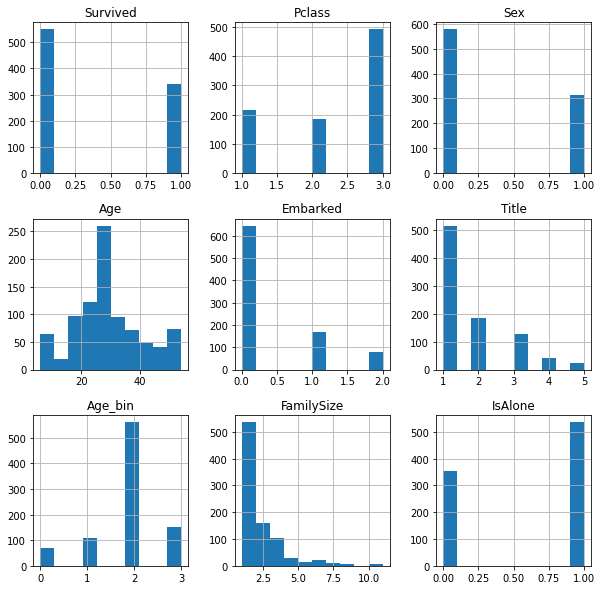

In [38]:
train_df.hist(figsize=(10,10));

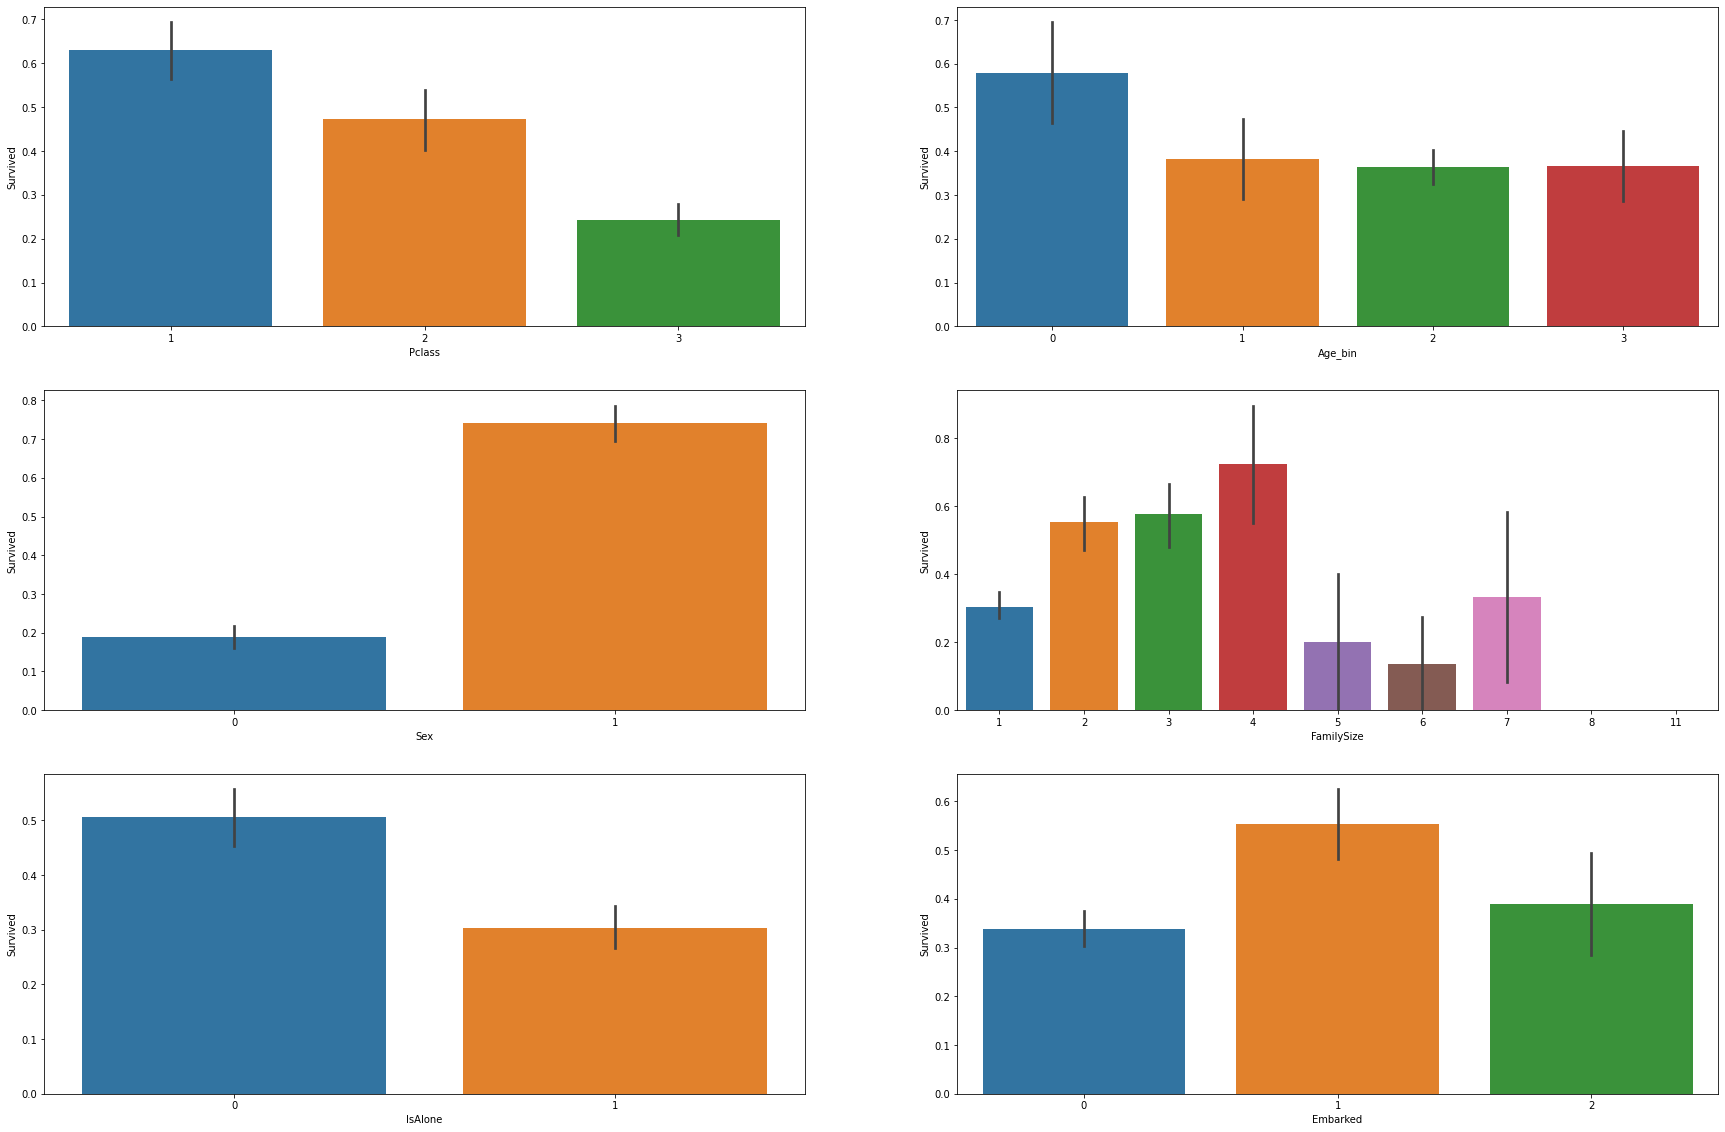

In [39]:
plt.figure(figsize=(30, 20))
plt.subplot(321)
sns.barplot(x = 'Pclass', y = 'Survived', data = train_df)
plt.subplot(322)
sns.barplot(x = 'Age_bin', y = 'Survived', data = train_df)
plt.subplot(323)
sns.barplot(x = 'Sex', y = 'Survived', data = train_df)
plt.subplot(324)
sns.barplot(x = 'FamilySize', y = 'Survived', data = train_df)
plt.subplot(325)
sns.barplot(x = 'IsAlone', y = 'Survived', data = train_df)
plt.subplot(326)
sns.barplot(x = 'Embarked', y = 'Survived', data = train_df);

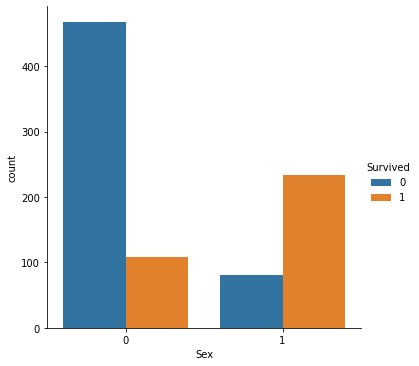

In [40]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = train_df)

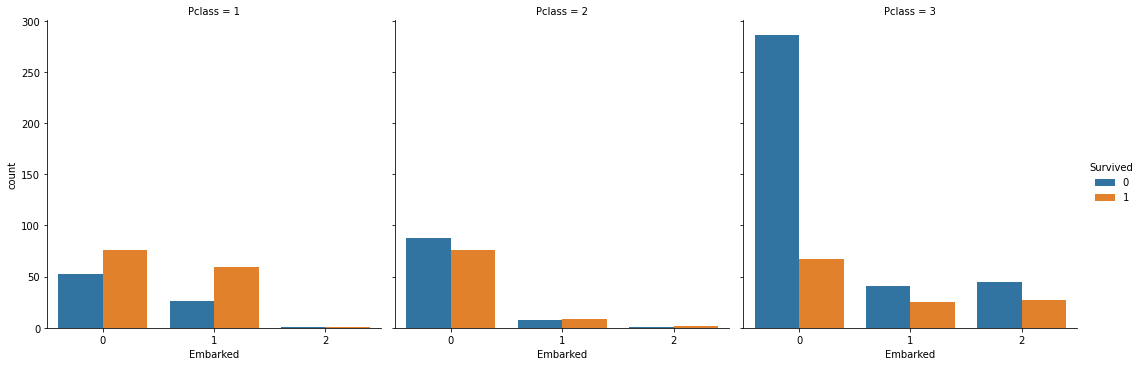

In [41]:

sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = train_df)

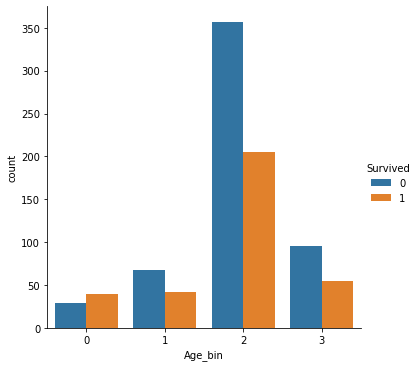

In [42]:

sns.catplot(x ='Age_bin', hue ='Survived', kind ='count', data = train_df)

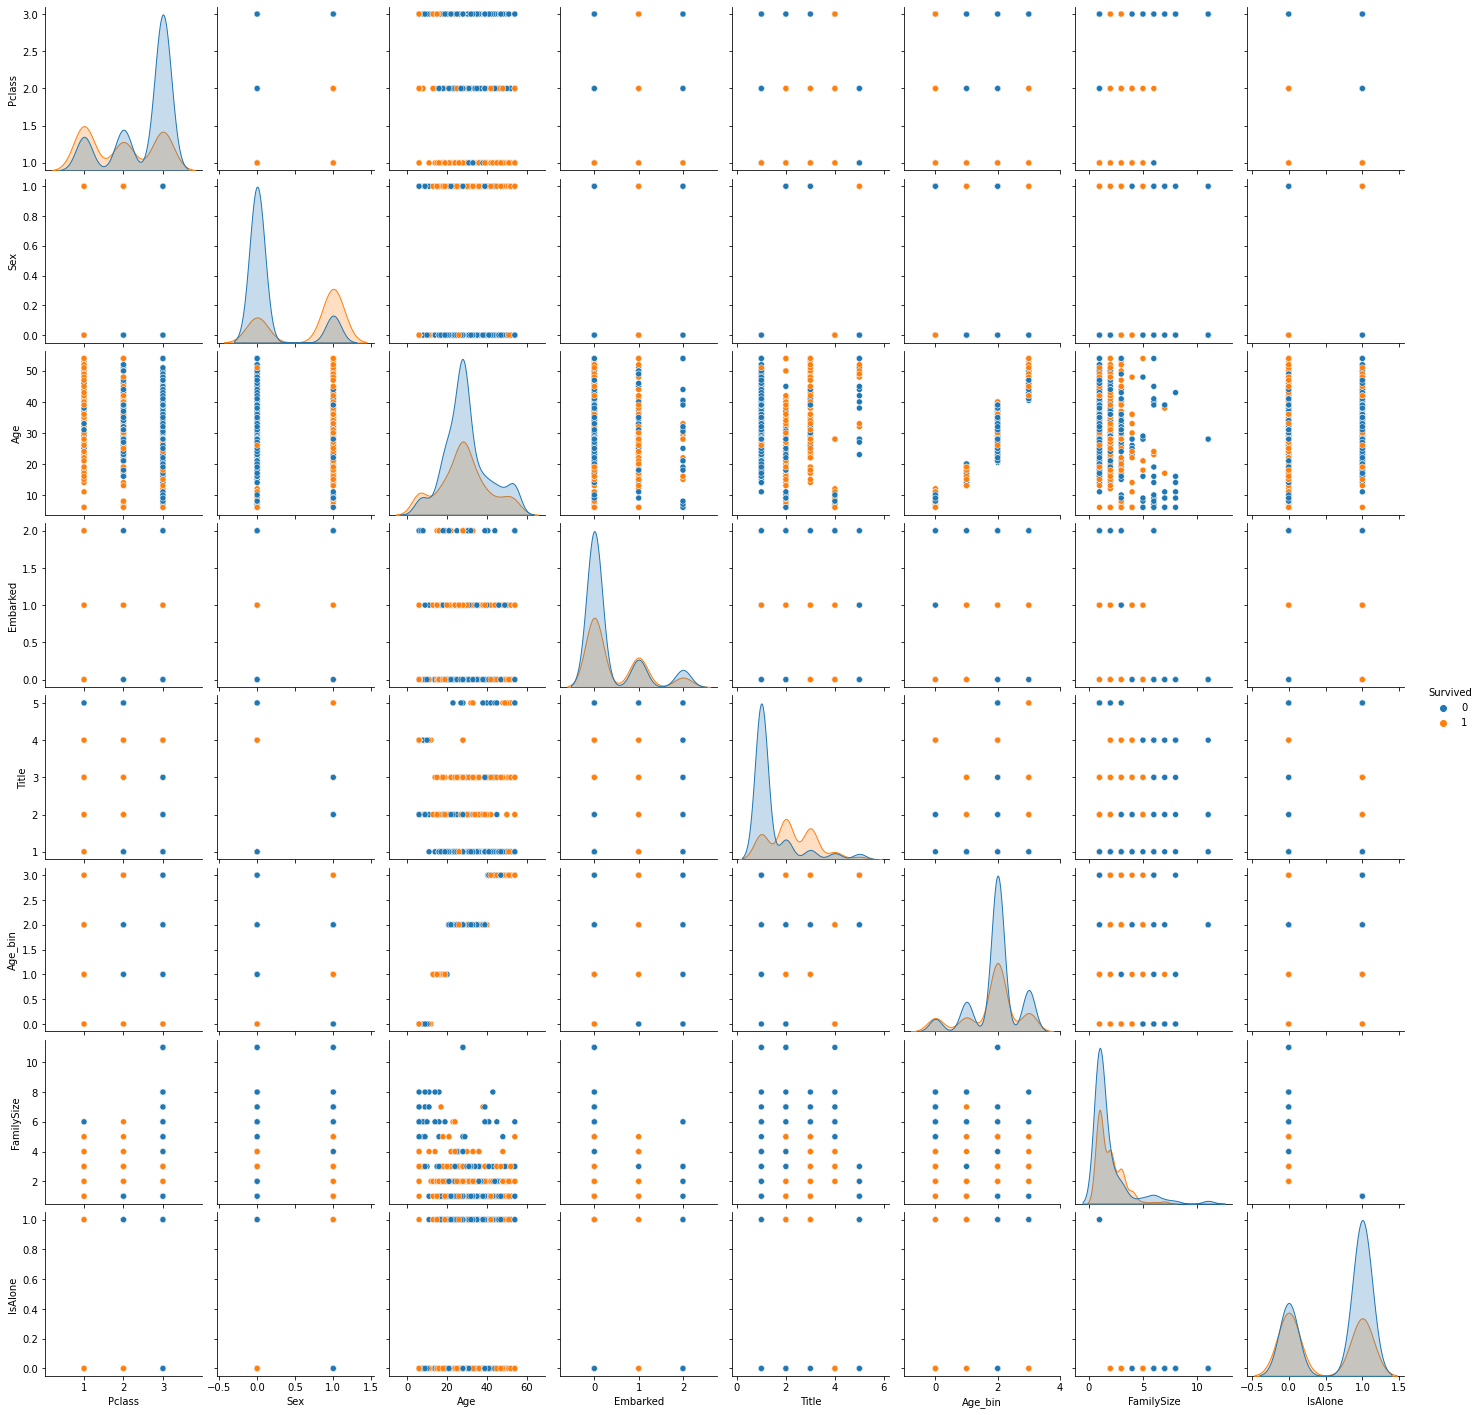

In [43]:

sns.pairplot(train_df, hue='Survived')

<AxesSubplot:>

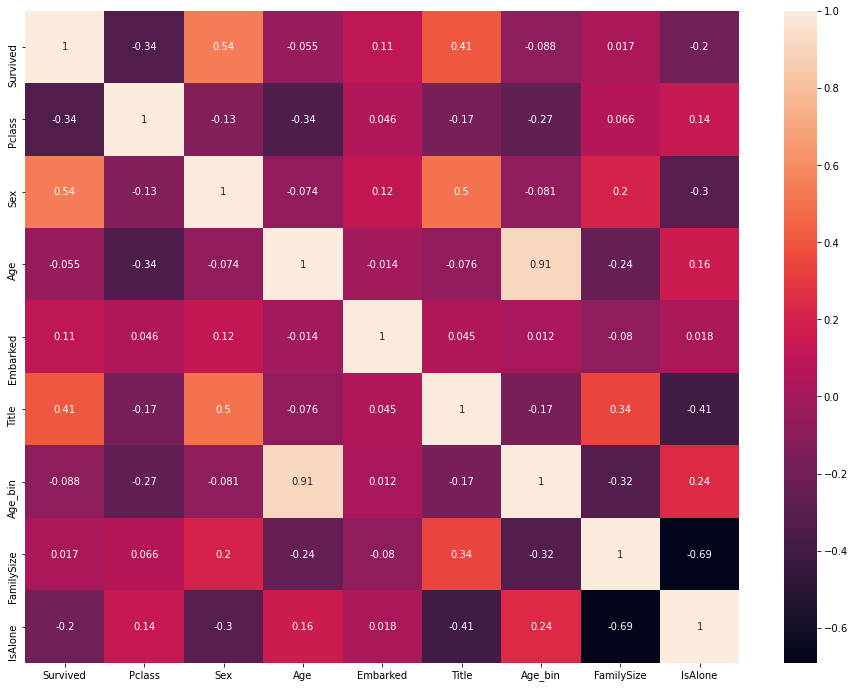

In [44]:
plt.figure(figsize=(16,12))
sns.heatmap(train_df.corr(), annot=True)

# TRAIN MODEL

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include

**Logistic Regression**

**KNN or K-Nearest Neighbors**

**Support Vector Machines**

**Naive Bayes classifier**

**Decision Tree**

**Random Forrest**

**Perceptron**

**Artificial neural network**

**RVM or Relevance Vector Machine**

# Logistic Regression

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. 

Note the confidence score generated by the model based on our training dataset.

In [45]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [46]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.82

In [47]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.257120
4,Title,0.433928
3,Embarked,0.248525
2,Age,-0.014599
5,Age_bin,-0.430883
6,FamilySize,-0.438471
7,IsAlone,-0.584034
0,Pclass,-1.038353


# Support Vector Machines

Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

Note that the model generates a confidence score which is lower than Logistics Regression model.



In [48]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

75.42

# K-Nearest Neighbors

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. 

In [49]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.53

**KNN confidence score is better than Logistics Regression & SVM.**

# Naive Bayes Classifier

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.

In [50]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.58

# Perceptron

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

In [51]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

75.53

In [52]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

51.4

In [53]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

75.98

# Decision Tree

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. 

In [54]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

93.04

**

# Random Forests

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [55]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

93.04

**The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.**

# Model Evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [56]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,93.04
8,Decision Tree,93.04
1,KNN,86.53
2,Logistic Regression,81.82
4,Naive Bayes,80.58
6,Stochastic Gradient Decent,75.98
5,Perceptron,75.53
0,Support Vector Machines,75.42
7,Linear SVC,51.40


# Conclusion

**>Random Forest & Decision Tree give the highest accuracy among models evaluated so far.**


**>SVM gives the least accuracy.**